In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib as plt
import scipy as sp
import pandas as pd
%matplotlib inline

# Boundary Conditions

In [2]:
tCold = 1.5e+04
rMin = 1
rMax = 30

In [3]:
def tempCyl(radius, tHot):
    return (((tCold - tHot)/(np.log(rMin)-np.log(rMax))) * (np.log(radius)-np.log(rMax))) + tHot
def tempSph(radius, tHot):
    return tHot - rMin*((tCold-tHot)/(rMax-rMin)) + ((1/radius)*((rMax*rMin*(tCold - tHot))/(rMax-rMin)))

In [4]:
radii = np.linspace(1,30,1500)

print radii

[ 1.          1.01934623  1.03869246 ... 29.96130754 29.98065377
 30.        ]


In [5]:
cylinderRange = tempCyl(radii, 10**6)
print cylinderRange
sphereRange = tempSph(radii, 10**6)
print sphereRange

[  15000.           20549.23676329   25994.13807239 ...  999626.24267192
  999813.18163148 1000000.        ]


Text(0.5,1,u'T vs. R - Cylinder, $T_{Hot} = 10^6 K$')

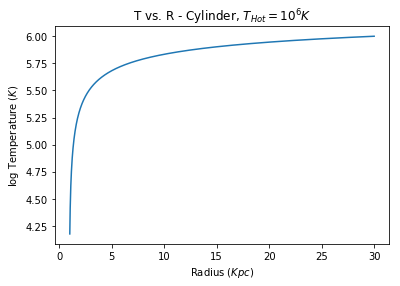

In [7]:
plt.pyplot.plot(radii,np.log10(cylinderRange))
plt.pyplot.xlabel('Radius ($Kpc$)')
plt.pyplot.ylabel('log Temperature ($K$)')
plt.pyplot.title('T vs. R - Cylinder, $T_{Hot} = 10^6 K$')

Text(0.5,1,u'T vs. R - Sphere, $T_{Hot} = 10^6 K$')

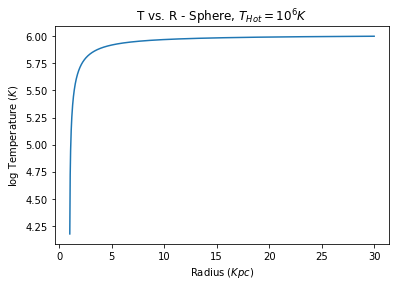

In [8]:
plt.pyplot.plot(radii,np.log10(sphereRange))
plt.pyplot.xlabel('Radius ($Kpc$)')
plt.pyplot.ylabel('log Temperature ($K$)')
plt.pyplot.title('T vs. R - Sphere, $T_{Hot} = 10^6 K$')

In [9]:
cylinderRange5 = tempCyl(radii, 10**5)
print cylinderRange5

[ 15000.          15478.86814709  15948.73272706 ...  99967.74682956
  99983.87861794 100000.        ]


In [10]:
sphereRange5 = tempSph(radii, 10**5)
print sphereRange5

[ 15000.          16668.84816754  18275.52986513 ...  99996.21482009
  99998.10863132 100000.        ]


Text(0.5,1,u'T vs. R - Cylinder, $T_{Hot} = 10^5 K$')

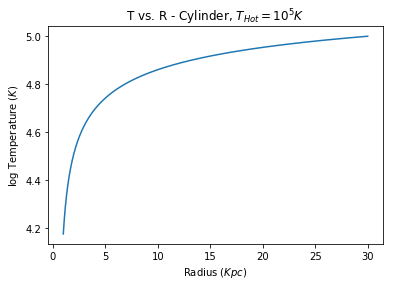

In [11]:
plt.pyplot.plot(radii,np.log10(cylinderRange5))
plt.pyplot.xlabel('Radius ($Kpc$)')
plt.pyplot.ylabel('log Temperature ($K$)')
plt.pyplot.title('T vs. R - Cylinder, $T_{Hot} = 10^5 K$')

Text(0.5,1,u'T vs. R - Sphere, $T_{Hot} = 10^5 K$')

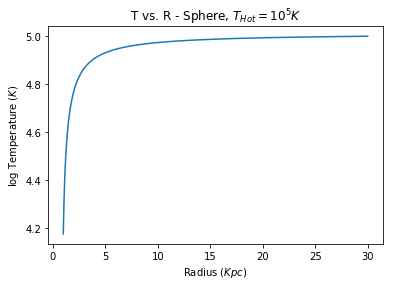

In [12]:
plt.pyplot.plot(radii,np.log10(sphereRange5))
plt.pyplot.xlabel('Radius ($Kpc$)')
plt.pyplot.ylabel('log Temperature ($K$)')
plt.pyplot.title('T vs. R - Sphere, $T_{Hot} = 10^5 K$')

# Temperature vs. Radius

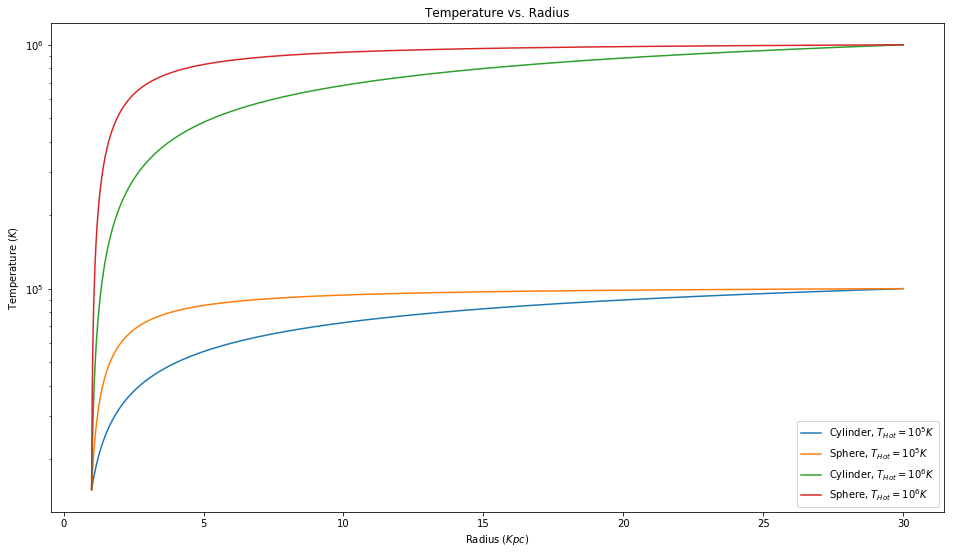

In [60]:
#plt.pyplot.figure(figsize=(6,4))

plt.pyplot.semilogy(radii, cylinderRange5)
plt.pyplot.semilogy(radii, sphereRange5)
plt.pyplot.semilogy(radii, cylinderRange)
plt.pyplot.semilogy(radii, sphereRange)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($Kpc$)')
plt.pyplot.ylabel('Temperature ($K$)')
plt.pyplot.title('Temperature vs. Radius')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Temperature vs Radius.png')
plt.pyplot.show()

In [14]:
radiiCentimeters = radii*(3.086e+21)
print radiiCentimeters

[3.08600000e+21 3.14570247e+21 3.20540494e+21 ... 9.24605951e+22
 9.25202975e+22 9.25800000e+22]


In [15]:
scaledTemp = 0
numberDensity = 0
scaledDensity = 0
kBoltzmann = 8.6173303e-5

In [16]:
def kappaCyl(radius,tHot):
    #scaledTempCyl = (kBoltzmann*tempCyl(radius,tHot))/(10)
    #scaledDensityCyl = (10**(-3)/tHot)/(10**(-3))
    #return (4e+32*((scaledTempCyl)**(5/2))*(scaledDensityCyl**(-1)))*((10**(-3)/tHot)*kBoltzmann)
    return 4.01e-34*(tempCyl(radius,tHot))**(5/2)

def kappaSph(radius,tHot):
    #scaledTempSph = (kBoltzmann*tempSph(radius,tHot))/(10)
    #scaledDensitySph = (10**(-3)/tHot)/(10**(-3))
    #return (4e+32*((scaledTempSph)**(5/2))*(scaledDensitySph**(-1)))*((10**(-3)/tHot)*kBoltzmann)
    return 4.01e-34*(tempSph(radius,tHot))**(5/2)

In [20]:
sphereKappa5 = kappaSph(radii,10**5)
print sphereKappa5

[9.02250000e-26 1.11418050e-25 1.33931992e-25 ... 4.00969643e-24
 4.00984831e-24 4.01000000e-24]


# Thermal Conductivity vs. Radius

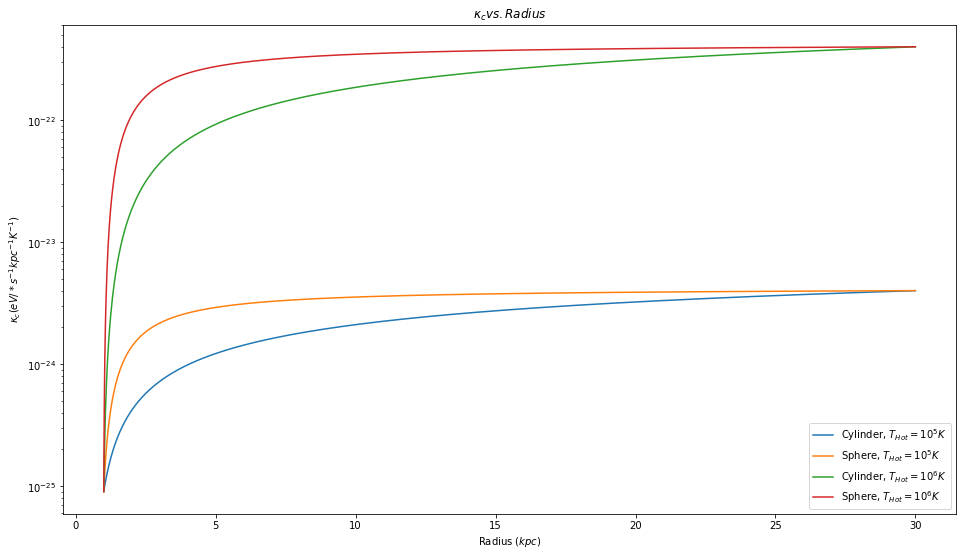

In [58]:
plt.pyplot.semilogy(radii, cylinderKappa5)
plt.pyplot.semilogy(radii, sphereKappa5)
plt.pyplot.semilogy(radii, cylinderKappa)
plt.pyplot.semilogy(radii, sphereKappa)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('$\kappa_{c} (eV/*s^{-1}kpc^{-1}K^{-1})$')
plt.pyplot.title('$\kappa_{c} vs. Radius$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Kappa_c vs Radius - kpc.png')
plt.pyplot.show()

plt.pyplot.loglog(radiiCentimeters, cylinderKappa5)
plt.pyplot.loglog(radiiCentimeters, sphereKappa5)
plt.pyplot.loglog(radiiCentimeters, cylinderKappa)
plt.pyplot.loglog(radiiCentimeters, sphereKappa)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($cm$)')
plt.pyplot.ylabel('$\kappa_{c} (eV*s^{-1}cm^{-1}K^{-1})$')
plt.pyplot.title('$\kappa_{c} vs. Radius$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Kappa_c vs Radius - cm.png')
plt.pyplot.show()

In [22]:
def dTdr_sph(radius,tHot):
    return (radius**(-2))*((rMax*rMin*(tHot-tCold))/(rMax-rMin))
def dTdr_cyl(radius,tHot):
    return (radius**(-1))*((tCold-tHot)/(np.log(rMin)-np.log(rMax)))

In [23]:
def heatCyl(radius,tHot):
    return kappaCyl(radius,tHot)*dTdr_cyl(radius,tHot)
    
def heatSph(radius,tHot):
    return kappaSph(radius,tHot)*dTdr_sph(radius,tHot)

# Units for both are eV/s/cm^2

In [24]:
cylinderHeat = heatCyl(radiiCentimeters,10**6)
sphereHeat = heatSph(radiiCentimeters, 10**6)

[7.74372916e-36 7.60263912e-36 7.46669854e-36 ... 2.95156032e-37
 2.94972765e-37 2.94789729e-37]


In [26]:
cylinderHeat5 = heatCyl(radiiCentimeters,10**5)
print cylinderHeat5

[5.08700531e-39 4.99427824e-39 4.90493627e-39 ... 1.93621044e-40
 1.93500773e-40 1.93380654e-40]


In [27]:
sphereHeat5 = heatSph(radiiCentimeters, 10**5)
print sphereHeat5

[3.92272070e-62 3.77523459e-62 3.63591254e-62 ... 4.36984328e-65
 4.36420547e-65 4.35857855e-65]


# Heat flow vs. Radius

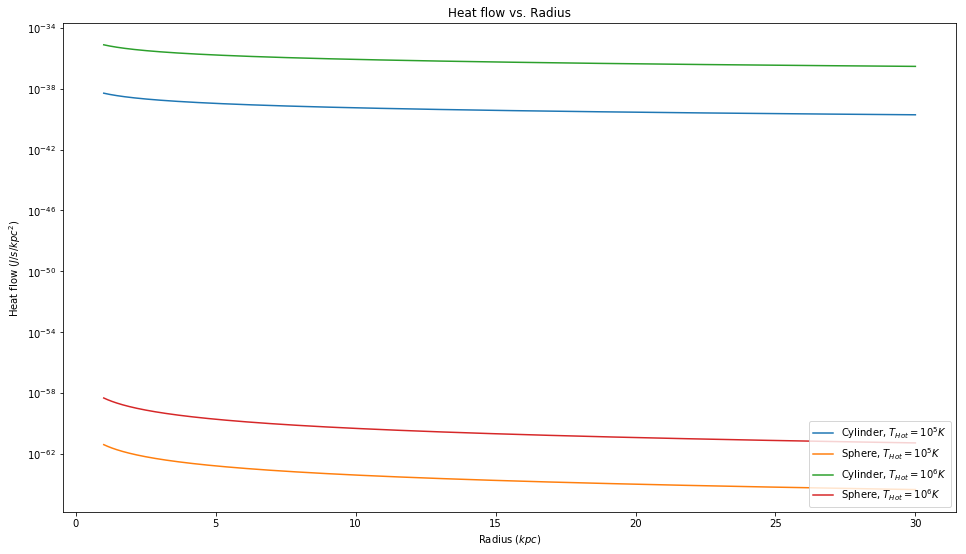

In [28]:
plt.pyplot.semilogy(radii, cylinderHeat5)
plt.pyplot.semilogy(radii, sphereHeat5)
plt.pyplot.semilogy(radii, cylinderHeat)
plt.pyplot.semilogy(radii, sphereHeat)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Heat flow ($J/s/kpc^{2}$)')
plt.pyplot.title('Heat flow vs. Radius')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Heat flow vs Radius.png')
plt.pyplot.show()

In [29]:
radii = radii.flatten()
print radii

[ 1.          1.01934623  1.03869246 ... 29.96130754 29.98065377
 30.        ]


In [30]:
metallicityRange = np.linspace(0.01,1.0,99)
alphaRange = 1.0 - (1.0/3.0)*np.log(metallicityRange)
print alphaRange

[2.53505673 2.30231131 2.16659274 2.0704173  1.99586738 1.93498109
 1.88351724 1.83894657 1.79963873 1.76448111 1.73268041 1.70365109
 1.67694859 1.65222742 1.62921375 1.60768687 1.58746627 1.56840246
 1.5503702  1.53326357 1.51699216 1.5014782  1.48665429 1.47246165
 1.4588487  1.44576995 1.43318504 1.42105804 1.40935679 1.3980524
 1.38711883 1.37653254 1.36627213 1.35631814 1.3466528  1.33725983
 1.32812431 1.3192325  1.31057173 1.30213031 1.29389738 1.28586291
 1.27801754 1.27035259 1.26285994 1.25553201 1.24836172 1.24134242
 1.23446789 1.22773228 1.22113009 1.21465612 1.2083055  1.20207361
 1.1959561  1.18994884 1.18404792 1.17824966 1.17255053 1.16694721
 1.16143652 1.15601545 1.15068114 1.14543086 1.14026199 1.13517204
 1.13015866 1.12521955 1.12035257 1.11555563 1.11082674 1.106164
 1.10156558 1.09702974 1.0925548  1.08813913 1.08378119 1.0794795
 1.07523261 1.07103915 1.06689779 1.06280725 1.0587663  1.05477376
 1.05082847 1.04692933 1.04307527 1.03926526 1.03549832 1.03177346

In [31]:
temperatureRange = np.linspace(1.5e+04,1.0e+08,8000)
print temperatureRange

[1.50000000e+04 2.74996875e+04 3.99993749e+04 ... 9.99750006e+07
 9.99875003e+07 1.00000000e+08]


In [32]:
def L23f_temp(temperature, metallicity):
    L23f = np.zeros_like(temperature)
    tempB = 1.0e+06 + 1.5e+07*(metallicity)**(2.0/3.0)
    tempM = 1.5e+05
    tempR = 1.5e+04
    
    if (metallicity == 0.0):
        for i in np.arange(len(temperature)):
            alpha = -0.8
            tempB = 1.0e+06
            if ((temperature[i] >= tempR) and (temperature[i] <= tempB)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                print i, temperature[i], (temperature[i]/tempR)
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempB/tempR)**(alpha))*((temperature[i]/tempB)**(1.0/3.0))
                print i, temperature[i]
            else:
                return 'error!!!'
        return L23f
    
    elif ((metallicity <= 1.0) and (metallicity > 0.0)):
        alpha = (1.0 + ((1.0/3.0)*np.log(metallicity)))
        for i in np.arange(len(temperature)):
            if ((temperature[i] >= tempR) and (temperature[i]<= tempM)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                print i, temperature[i], (temperature[i]/tempR)
            elif ((temperature[i] > tempM) and (temperature[i] <= tempB)):
                L23f[i] = (12.0*(tempM/tempR)**(alpha))*(temperature[i]/tempM)**(-1.0)
                print i, temperature[i]
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempM/tempR)**(alpha))*((tempB/tempM)**(-1.0))*((temperature[i]/tempB)**(1.0/3.0))
            else:
                return 'error!!!'
            
        return L23f
    else:
        return 'too metal for me!!!'

In [33]:
#temperatureRange = np.array([1.5e+04])

coolingFunctionFull = L23f_temp(temperatureRange, 1.0)
coolingFunctionThree = L23f_temp(temperatureRange, 0.3)
coolingFunctionTenth = L23f_temp(temperatureRange, 0.1)
coolingFunctionPoint03 = L23f_temp(temperatureRange, 0.03)
coolingFunctionClean = L23f_temp(temperatureRange, 0.0)

#print coolingFunctionTenth
#print coolingFunctionQuarter
#print coolingFunctionHalf
#print coolingFunctionFull
#print coolingFunctionClean

0 15000.0 1.0
1 27499.68746093262 1.833312497395508
2 39999.37492186524 2.666624994791016
3 52499.06238279785 3.499937492186523
4 64998.74984373047 4.333249989582031
5 77498.4373046631 5.16656248697754
6 89998.1247655957 5.999874984373046
7 102497.81222652832 6.8331874817685545
8 114997.49968746094 7.666499979164063
9 127497.18714839355 8.49981247655957
10 139996.8746093262 9.33312497395508
11 152496.56207025878
12 164996.2495311914
13 177495.936992124
14 189995.62445305663
15 202495.31191398925
16 214994.99937492187
17 227494.6868358545
18 239994.3742967871
19 252494.06175771973
20 264993.7492186524
21 277493.43667958496
22 289993.12414051755
23 302492.8116014502
24 314992.4990623828
25 327492.18652331544
26 339991.873984248
27 352491.5614451807
28 364991.24890611327
29 377490.9363670459
30 389990.6238279785
31 402490.31128891115
32 414989.99874984374
33 427489.68621077633
34 439989.373671709
35 452489.06113264157
36 464988.7485935742
37 477488.4360545068
38 489988.12351543945
39 5024

372 4664883.735466934
373 4677383.422927866
374 4689883.110388799
375 4702382.7978497315
376 4714882.485310664
377 4727382.172771596
378 4739881.860232529
379 4752381.547693462
380 4764881.235154394
381 4777380.922615327
382 4789880.61007626
383 4802380.297537193
384 4814879.984998125
385 4827379.6724590575
386 4839879.35991999
387 4852379.047380922
388 4864878.734841855
389 4877378.422302788
390 4889878.109763721
391 4902377.797224653
392 4914877.484685586
393 4927377.172146519
394 4939876.859607451
395 4952376.547068384
396 4964876.234529316
397 4977375.921990249
398 4989875.609451181
399 5002375.296912114
400 5014874.984373047
401 5027374.671833979
402 5039874.359294912
403 5052374.046755845
404 5064873.734216778
405 5077373.42167771
406 5089873.109138642
407 5102372.796599575
408 5114872.484060507
409 5127372.17152144
410 5139871.858982373
411 5152371.546443306
412 5164871.233904238
413 5177370.921365171
414 5189870.608826104
415 5202370.296287036
416 5214869.983747968
417 5227369.

872 10914727.465933243
873 10927227.153394174
874 10939726.840855107
875 10952226.52831604
876 10964726.215776972
877 10977225.903237905
878 10989725.590698838
879 11002225.278159771
880 11014724.965620702
881 11027224.653081635
882 11039724.340542568
883 11052224.0280035
884 11064723.715464434
885 11077223.402925367
886 11089723.0903863
887 11102222.77784723
888 11114722.465308163
889 11127222.152769096
890 11139721.84023003
891 11152221.527690962
892 11164721.215151895
893 11177220.902612828
894 11189720.590073759
895 11202220.277534692
896 11214719.964995624
897 11227219.652456557
898 11239719.33991749
899 11252219.027378423
900 11264718.714839356
901 11277218.402300287
902 11289718.08976122
903 11302217.777222153
904 11314717.464683086
905 11327217.152144019
906 11339716.839604951
907 11352216.527065884
908 11364716.214526815
909 11377215.901987748
910 11389715.589448681
911 11402215.276909614
912 11414714.964370547
913 11427214.65183148
914 11439714.339292413
915 11452214.02675334

87 1102472.8091011376
88 1114972.4965620702
89 1127472.1840230029
90 1139971.8714839355
91 1152471.5589448682
92 1164971.2464058008
93 1177470.9338667335
94 1189970.621327666
95 1202470.3087885985
96 1214969.9962495312
97 1227469.6837104638
98 1239969.3711713965
99 1252469.058632329
100 1264968.7460932618
101 1277468.4335541944
102 1289968.1210151268
103 1302467.8084760595
104 1314967.495936992
105 1327467.1833979248
106 1339966.8708588574
107 1352466.55831979
108 1364966.2457807227
109 1377465.9332416554
110 1389965.6207025878
111 1402465.3081635204
112 1414964.995624453
113 1427464.6830853857
114 1439964.3705463184
115 1452464.058007251
116 1464963.7454681837
117 1477463.432929116
118 1489963.1203900487
119 1502462.8078509814
120 1514962.495311914
121 1527462.1827728467
122 1539961.8702337793
123 1552461.557694712
124 1564961.2451556446
125 1577460.932616577
126 1589960.6200775097
127 1602460.3075384423
128 1614959.994999375
129 1627459.6824603076
130 1639959.3699212403
131 1652459.0

586 7339816.852106513
587 7352316.539567446
588 7364816.227028378
589 7377315.914489311
590 7389815.601950244
591 7402315.289411177
592 7414814.976872109
593 7427314.664333042
594 7439814.351793975
595 7452314.039254907
596 7464813.7267158395
597 7477313.414176772
598 7489813.101637705
599 7502312.789098637
600 7514812.47655957
601 7527312.164020503
602 7539811.851481436
603 7552311.538942368
604 7564811.226403301
605 7577310.9138642335
606 7589810.6013251655
607 7602310.288786098
608 7614809.976247031
609 7627309.663707964
610 7639809.351168896
611 7652309.038629829
612 7664808.726090762
613 7677308.413551694
614 7689808.101012627
615 7702307.78847356
616 7714807.475934492
0 15000.0 1.0
1 27499.68746093262 1.833312497395508
2 39999.37492186524 2.666624994791016
3 52499.06238279785 3.499937492186523
4 64998.74984373047 4.333249989582031
5 77498.4373046631 5.16656248697754
6 89998.1247655957 5.999874984373046
7 102497.81222652832 6.8331874817685545
8 114997.49968746094 7.666499979164063

120 1514962.495311914
121 1527462.1827728467
122 1539961.8702337793
123 1552461.557694712
124 1564961.2451556446
125 1577460.932616577
126 1589960.6200775097
127 1602460.3075384423
128 1614959.994999375
129 1627459.6824603076
130 1639959.3699212403
131 1652459.057382173
132 1664958.7448431053
133 1677458.432304038
134 1689958.1197649706
135 1702457.8072259033
136 1714957.494686836
137 1727457.1821477686
138 1739956.8696087012
139 1752456.5570696339
140 1764956.2445305663
141 1777455.931991499
142 1789955.6194524316
143 1802455.3069133642
144 1814954.9943742969
145 1827454.6818352295
146 1839954.3692961622
147 1852454.0567570946
148 1864953.7442180272
149 1877453.4316789599
150 1889953.1191398925
151 1902452.8066008252
152 1914952.4940617578
153 1927452.1815226905
154 1939951.868983623
155 1952451.5564445555
156 1964951.2439054882
157 1977450.9313664208
158 1989950.6188273535
159 2002450.306288286
160 2014949.9937492188
161 2027449.6812101514
162 2039949.3686710838
163 2052449.056132016

385 4827379.6724590575
386 4839879.35991999
387 4852379.047380922
388 4864878.734841855
389 4877378.422302788
390 4889878.109763721
391 4902377.797224653
392 4914877.484685586
393 4927377.172146519
394 4939876.859607451
395 4952376.547068384
396 4964876.234529316
397 4977375.921990249
398 4989875.609451181
399 5002375.296912114
400 5014874.984373047
401 5027374.671833979
402 5039874.359294912
403 5052374.046755845
404 5064873.734216778
405 5077373.42167771
406 5089873.109138642
407 5102372.796599575
408 5114872.484060507
409 5127372.17152144
410 5139871.858982373
411 5152371.546443306
412 5164871.233904238
413 5177370.921365171
414 5189870.608826104
415 5202370.296287036
416 5214869.983747968
417 5227369.671208901
418 5239869.358669834
419 5252369.046130766
420 5264868.733591699
421 5277368.421052632
422 5289868.108513564
423 5302367.795974497
424 5314867.48343543
425 5327367.1708963625
426 5339866.858357294
427 5352366.545818227
428 5364866.23327916
429 5377365.920740093
430 5389865.6

784 9814754.969371172
785 9827254.656832105
786 9839754.344293037
787 9852254.03175397
788 9864753.719214901
789 9877253.406675834
790 9889753.094136767
791 9902252.7815977
792 9914752.469058633
793 9927252.156519566
794 9939751.843980499
795 9952251.53144143
796 9964751.218902363
797 9977250.906363295
798 9989750.593824228
799 10002250.281285161
800 10014749.968746094
801 10027249.656207027
802 10039749.343667958
803 10052249.03112889
804 10064748.718589824
805 10077248.406050757
806 10089748.09351169
807 10102247.780972622
808 10114747.468433555
809 10127247.155894486
810 10139746.84335542
811 10152246.530816352
812 10164746.218277285
813 10177245.905738218
814 10189745.59319915
815 10202245.280660084
816 10214744.968121015
817 10227244.655581947
818 10239744.34304288
819 10252244.030503813
820 10264743.717964746
821 10277243.405425679
822 10289743.092886612
823 10302242.780347543
824 10314742.467808476
825 10327242.155269409
826 10339741.842730341
827 10352241.530191274
828 10364741

1145 14327142.142767847
1146 14339641.83022878
1147 14352141.517689712
1148 14364641.205150643
1149 14377140.892611576
1150 14389640.58007251
1151 14402140.267533442
1152 14414639.954994375
1153 14427139.642455308
1154 14439639.32991624
1155 14452139.017377172
1156 14464638.704838105
1157 14477138.392299037
1158 14489638.07975997
1159 14502137.767220903
1160 14514637.454681836
1161 14527137.142142769
1162 14539636.8296037
1163 14552136.517064633
1164 14564636.204525566
1165 14577135.891986499
1166 14589635.579447431
1167 14602135.266908364
1168 14614634.954369297
1169 14627134.641830228
1170 14639634.329291161
1171 14652134.016752094
1172 14664633.704213027
1173 14677133.39167396
1174 14689633.079134893
1175 14702132.766595826
1176 14714632.454056757
1177 14727132.14151769
1178 14739631.828978622
1179 14752131.516439555
1180 14764631.203900488
1181 14777130.891361421
1182 14789630.578822354
1183 14802130.266283285
1184 14814629.953744218
1185 14827129.64120515
1186 14839629.328666084
1

1634 20439489.311163895
1635 20451988.998624828
1636 20464488.68608576
1637 20476988.373546693
1638 20489488.061007626
1639 20501987.74846856
1640 20514487.435929492
1641 20526987.123390425
1642 20539486.810851358
1643 20551986.49831229
1644 20564486.185773224
1645 20576985.873234157
1646 20589485.560695086
1647 20601985.24815602
1648 20614484.93561695
1649 20626984.623077884
1650 20639484.310538817
1651 20651983.99799975
1652 20664483.685460683
1653 20676983.372921616
1654 20689483.06038255
1655 20701982.74784348
1656 20714482.435304414
1657 20726982.122765347
1658 20739481.81022628
1659 20751981.497687213
1660 20764481.185148142
1661 20776980.872609075
1662 20789480.560070008
1663 20801980.24753094
1664 20814479.934991874
1665 20826979.622452807
1666 20839479.30991374
1667 20851978.997374672
1668 20864478.684835605
1669 20876978.37229654
1670 20889478.05975747
1671 20901977.747218404
1672 20914477.434679337
1673 20926977.12214027
1674 20939476.8096012
1675 20951976.49706213
1676 2096

2067 25851853.98174772
2068 25864353.669208653
2069 25876853.356669586
2070 25889353.044130515
2071 25901852.73159145
2072 25914352.41905238
2073 25926852.106513314
2074 25939351.793974247
2075 25951851.48143518
2076 25964351.168896113
2077 25976850.856357045
2078 25989350.54381798
2079 26001850.23127891
2080 26014349.918739844
2081 26026849.606200777
2082 26039349.29366171
2083 26051848.981122643
2084 26064348.668583572
2085 26076848.356044505
2086 26089348.043505438
2087 26101847.73096637
2088 26114347.418427303
2089 26126847.105888236
2090 26139346.79334917
2091 26151846.480810102
2092 26164346.168271035
2093 26176845.855731968
2094 26189345.5431929
2095 26201845.230653834
2096 26214344.918114766
2097 26226844.6055757
2098 26239344.29303663
2099 26251843.98049756
2100 26264343.667958494
2101 26276843.355419427
2102 26289343.04288036
2103 26301842.730341293
2104 26314342.417802226
2105 26326842.10526316
2106 26339341.79272409
2107 26351841.480185024
2108 26364341.167645957
2109 26376

2633 32926677.08463558
2634 32939176.772096515
2635 32951676.459557444
2636 32964176.147018377
2637 32976675.83447931
2638 32989175.521940242
2639 33001675.209401175
2640 33014174.89686211
2641 33026674.58432304
2642 33039174.271783974
2643 33051673.959244907
2644 33064173.64670584
2645 33076673.334166773
2646 33089173.021627706
2647 33101672.70908864
2648 33114172.39654957
2649 33126672.0840105
2650 33139171.771471433
2651 33151671.458932366
2652 33164171.1463933
2653 33176670.833854232
2654 33189170.521315165
2655 33201670.208776098
2656 33214169.89623703
2657 33226669.583697964
2658 33239169.271158896
2659 33251668.95861983
2660 33264168.646080762
2661 33276668.333541695
2662 33289168.021002628
2663 33301667.708463557
2664 33314167.39592449
2665 33326667.083385423
2666 33339166.770846356
2667 33351666.45830729
2668 33364166.14576822
2669 33376665.833229154
2670 33389165.520690087
2671 33401665.20815102
2672 33414164.895611953
2673 33426664.583072886
2674 33439164.27053382
2675 33451

3133 39176520.81510189
3134 39189020.50256282
3135 39201520.19002376
3136 39214019.87748469
3137 39226519.564945616
3138 39239019.25240655
3139 39251518.93986748
3140 39264018.62732842
3141 39276518.31478935
3142 39289018.002250284
3143 39301517.68971121
3144 39314017.37717215
3145 39326517.06463308
3146 39339016.752094015
3147 39351516.439554945
3148 39364016.12701588
3149 39376515.81447681
3150 39389015.50193774
3151 39401515.189398676
3152 39414014.876859605
3153 39426514.56432054
3154 39439014.25178147
3155 39451513.93924241
3156 39464013.62670334
3157 39476513.31416427
3158 39489013.0016252
3159 39501512.68908614
3160 39514012.37654707
3161 39526512.064008005
3162 39539011.751468934
3163 39551511.43892987
3164 39564011.1263908
3165 39576510.81385173
3166 39589010.501312666
3167 39601510.188773595
3168 39614009.87623453
3169 39626509.56369546
3170 39639009.2511564
3171 39651508.93861733
3172 39664008.62607826
3173 39676508.31353919
3174 39689008.00100013
3175 39701507.68846106
3176

3526 44088897.987248406
3527 44101397.67470934
3528 44113897.36217027
3529 44126397.04963121
3530 44138896.73709214
3531 44151396.424553074
3532 44163896.112014
3533 44176395.79947493
3534 44188895.48693587
3535 44201395.1743968
3536 44213894.861857735
3537 44226394.549318664
3538 44238894.2367796
3539 44251393.92424053
3540 44263893.611701466
3541 44276393.299162395
3542 44288892.98662333
3543 44301392.67408426
3544 44313892.3615452
3545 44326392.04900613
3546 44338891.736467056
3547 44351391.42392799
3548 44363891.11138892
3549 44376390.79884986
3550 44388890.48631079
3551 44401390.173771724
3552 44413889.86123265
3553 44426389.54869359
3554 44438889.23615452
3555 44451388.923615456
3556 44463888.611076385
3557 44476388.29853732
3558 44488887.98599825
3559 44501387.67345919
3560 44513887.36092012
3561 44526387.048381045
3562 44538886.73584198
3563 44551386.42330291
3564 44563886.11076385
3565 44576385.79822478
3566 44588885.48568571
3567 44601385.17314664
3568 44613884.86060758
3569 

3938 49238769.22115265
3939 49251268.90861358
3940 49263768.596074514
3941 49276268.28353544
3942 49288767.97099637
3943 49301267.65845731
3944 49313767.34591824
3945 49326267.033379175
3946 49338766.720840104
3947 49351266.40830104
3948 49363766.09576197
3949 49376265.78322291
3950 49388765.470683835
3951 49401265.15814477
3952 49413764.8456057
3953 49426264.53306664
3954 49438764.22052757
3955 49451263.907988496
3956 49463763.59544943
3957 49476263.28291036
3958 49488762.9703713
3959 49501262.65783223
3960 49513762.345293164
3961 49526262.03275409
3962 49538761.72021503
3963 49551261.40767596
3964 49563761.095136896
3965 49576260.782597825
3966 49588760.47005876
3967 49601260.15751969
3968 49613759.84498063
3969 49626259.53244156
3970 49638759.219902486
3971 49651258.90736342
3972 49663758.59482435
3973 49676258.28228529
3974 49688757.96974622
3975 49701257.657207154
3976 49713757.34466808
3977 49726257.03212902
3978 49738756.71958995
3979 49751256.407050885
3980 49763756.094511814
3

4302 53788655.45693212
4303 53801155.14439305
4304 53813654.831853986
4305 53826154.519314915
4306 53838654.20677585
4307 53851153.89423678
4308 53863653.58169771
4309 53876153.26915865
4310 53888652.956619576
4311 53901152.64408051
4312 53913652.33154144
4313 53926152.01900238
4314 53938651.70646331
4315 53951151.393924244
4316 53963651.08138517
4317 53976150.76884611
4318 53988650.45630704
4319 54001150.143767975
4320 54013649.831228904
4321 54026149.51868984
4322 54038649.20615077
4323 54051148.8936117
4324 54063648.581072636
4325 54076148.268533565
4326 54088647.9559945
4327 54101147.64345543
4328 54113647.33091637
4329 54126147.0183773
4330 54138646.70583823
4331 54151146.39329916
4332 54163646.0807601
4333 54176145.76822103
4334 54188645.455681965
4335 54201145.143142894
4336 54213644.83060383
4337 54226144.51806476
4338 54238644.20552569
4339 54251143.892986625
4340 54263643.580447555
4341 54276143.26790849
4342 54288642.95536942
4343 54301142.64283036
4344 54313642.330291286
43

5064 63313417.302162774
5065 63325916.9896237
5066 63338416.67708464
5067 63350916.36454557
5068 63363416.052006505
5069 63375915.739467435
5070 63388415.42692837
5071 63400915.1143893
5072 63413414.80185023
5073 63425914.489311166
5074 63438414.176772095
5075 63450913.86423303
5076 63463413.55169396
5077 63475913.2391549
5078 63488412.92661583
5079 63500912.61407676
5080 63513412.30153769
5081 63525911.98899863
5082 63538411.67645956
5083 63550911.363920495
5084 63563411.051381424
5085 63575910.73884235
5086 63588410.42630329
5087 63600910.11376422
5088 63613409.801225156
5089 63625909.488686085
5090 63638409.17614702
5091 63650908.86360795
5092 63663408.55106889
5093 63675908.238529816
5094 63688407.92599075
5095 63700907.61345168
5096 63713407.30091262
5097 63725906.98837355
5098 63738406.675834484
5099 63750906.36329541
5100 63763406.05075634
5101 63775905.73821728
5102 63788405.42567821
5103 63800905.113139145
5104 63813404.800600074
5105 63825904.48806101
5106 63838404.17552194
5

5834 72938176.64708088
5835 72950676.33454181
5836 72963176.02200276
5837 72975675.70946369
5838 72988175.39692461
5839 73000675.08438554
5840 73013174.77184649
5841 73025674.45930742
5842 73038174.14676835
5843 73050673.83422928
5844 73063173.52169022
5845 73075673.20915115
5846 73088172.89661208
5847 73100672.584073
5848 73113172.27153394
5849 73125671.95899488
5850 73138171.64645581
5851 73150671.33391674
5852 73163171.02137767
5853 73175670.70883861
5854 73188170.39629954
5855 73200670.08376047
5856 73213169.7712214
5857 73225669.45868234
5858 73238169.14614327
5859 73250668.8336042
5860 73263168.52106513
5861 73275668.20852607
5862 73288167.895987
5863 73300667.58344793
5864 73313167.27090886
5865 73325666.95836979
5866 73338166.64583074
5867 73350666.33329166
5868 73363166.0207526
5869 73375665.70821352
5870 73388165.39567447
5871 73400665.0831354
5872 73413164.77059633
5873 73425664.45805725
5874 73438164.1455182
5875 73450663.83297913
5876 73463163.52044006
5877 73475663.207900

6531 81650458.80735092
6532 81662958.49481185
6533 81675458.18227279
6534 81687957.86973372
6535 81700457.55719465
6536 81712957.24465558
6537 81725456.93211652
6538 81737956.61957745
6539 81750456.30703838
6540 81762955.99449931
6541 81775455.68196024
6542 81787955.36942118
6543 81800455.05688211
6544 81812954.74434304
6545 81825454.43180397
6546 81837954.11926492
6547 81850453.80672584
6548 81862953.49418677
6549 81875453.1816477
6550 81887952.86910865
6551 81900452.55656958
6552 81912952.2440305
6553 81925451.93149143
6554 81937951.61895236
6555 81950451.30641331
6556 81962950.99387424
6557 81975450.68133517
6558 81987950.3687961
6559 82000450.05625704
6560 82012949.74371797
6561 82025449.4311789
6562 82037949.11863983
6563 82050448.80610077
6564 82062948.4935617
6565 82075448.18102263
6566 82087947.86848356
6567 82100447.5559445
6568 82112947.24340543
6569 82125446.93086636
6570 82137946.61832729
6571 82150446.30578822
6572 82162945.99324916
6573 82175445.68071009
6574 82187945.368

7282 91037724.09051132
7283 91050223.77797225
7284 91062723.46543318
7285 91075223.15289411
7286 91087722.84035505
7287 91100222.52781598
7288 91112722.21527691
7289 91125221.90273784
7290 91137721.59019877
7291 91150221.27765971
7292 91162720.96512064
7293 91175220.65258157
7294 91187720.3400425
7295 91200220.02750345
7296 91212719.71496437
7297 91225219.4024253
7298 91237719.08988623
7299 91250218.77734718
7300 91262718.4648081
7301 91275218.15226904
7302 91287717.83972996
7303 91300217.5271909
7304 91312717.21465184
7305 91325216.90211277
7306 91337716.5895737
7307 91350216.27703463
7308 91362715.96449557
7309 91375215.6519565
7310 91387715.33941743
7311 91400215.02687836
7312 91412714.7143393
7313 91425214.40180023
7314 91437714.08926116
7315 91450213.77672209
7316 91462713.46418303
7317 91475213.15164396
7318 91487712.83910489
7319 91500212.52656582
7320 91512712.21402675
7321 91525211.9014877
7322 91537711.58894862
7323 91550211.27640955
7324 91562710.96387048
7325 91575210.65133

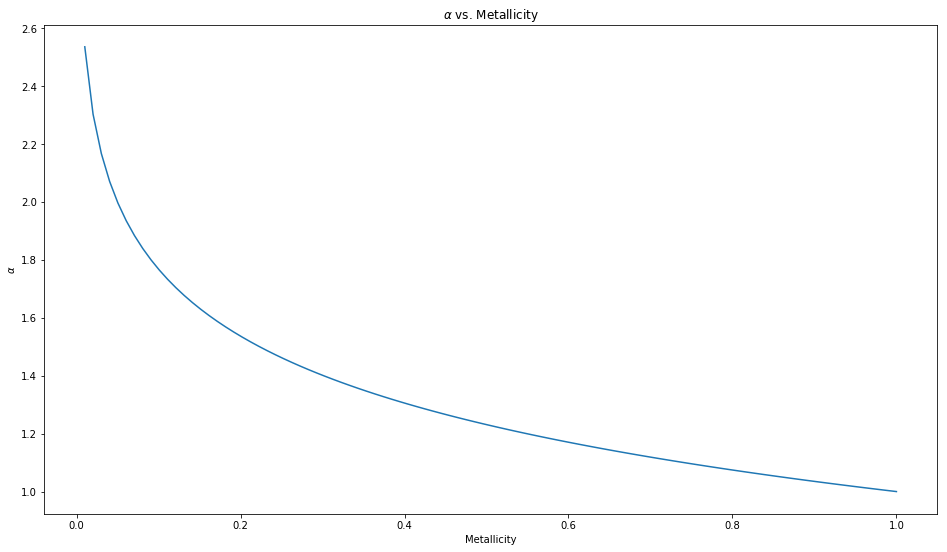

In [34]:
plt.pyplot.plot(metallicityRange, alphaRange)

plt.pyplot.xlabel('Metallicity')
plt.pyplot.ylabel(r'$\alpha$')
plt.pyplot.title(r'$\alpha$ vs. Metallicity')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.show()

In [35]:
#coolingFunctionTenth, coolingFunctionThree, coolingFunctionPoint03, coolingFunctionFull, coolingFunctionClean

# Cooling function vs. Temperature

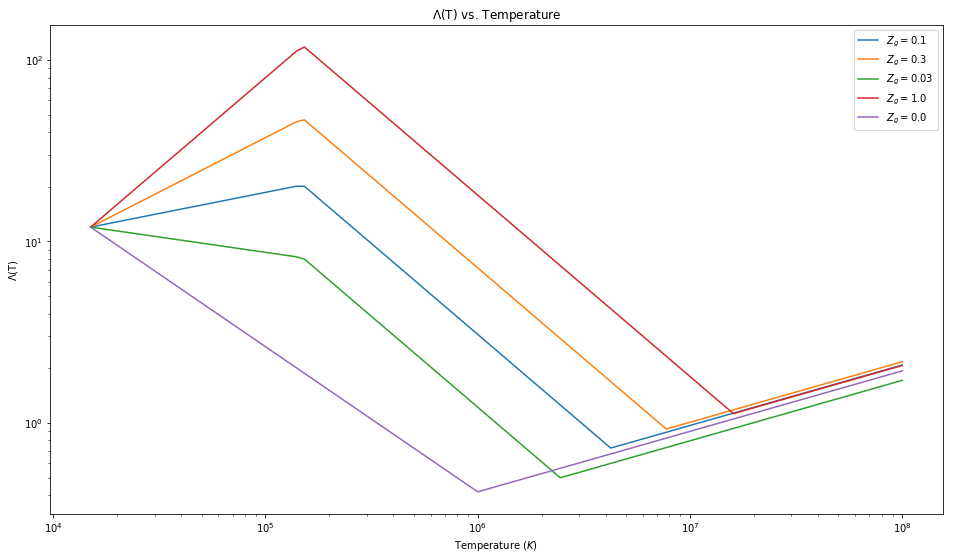

In [36]:
plt.pyplot.loglog(temperatureRange, coolingFunctionTenth)
plt.pyplot.loglog(temperatureRange, coolingFunctionThree)
plt.pyplot.loglog(temperatureRange, coolingFunctionPoint03)
plt.pyplot.loglog(temperatureRange, coolingFunctionFull)
plt.pyplot.loglog(temperatureRange, coolingFunctionClean)

plt.pyplot.legend(['$Z_{g} = 0.1$', '$Z_{g} = 0.3$', '$Z_{g} = 0.03$', '$Z_{g} = 1.0$', '$Z_{g} = 0.0$'], loc='upper right')

plt.pyplot.xlabel('Temperature ($K$)')
plt.pyplot.ylabel('$\Lambda$(T)')
plt.pyplot.title('$\Lambda$(T) vs. Temperature')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Thermal radiation vs. Temperature.png')
plt.pyplot.show()

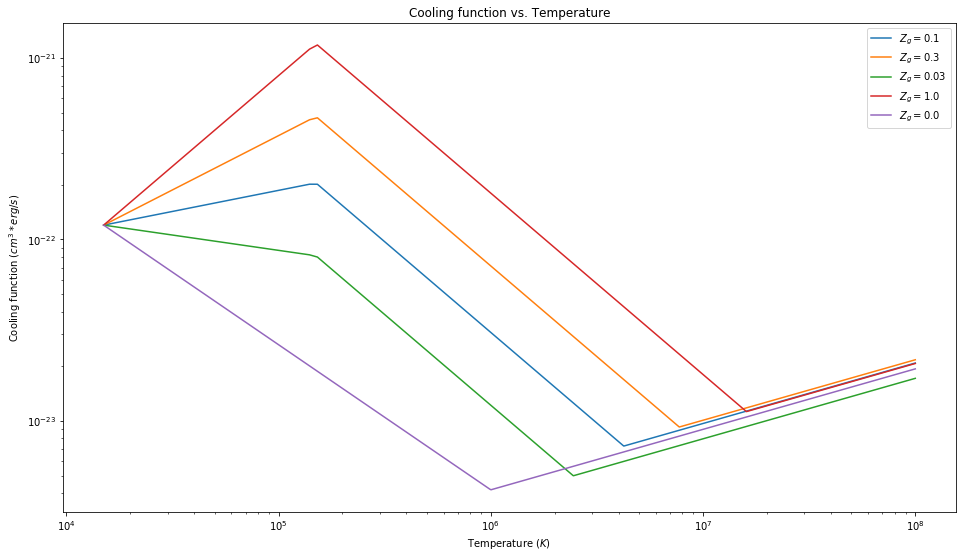

In [37]:
plt.pyplot.loglog(temperatureRange, (1.0e-23 * coolingFunctionTenth))
plt.pyplot.loglog(temperatureRange, (1.0e-23 * coolingFunctionThree))
plt.pyplot.loglog(temperatureRange, (1.0e-23 * coolingFunctionPoint03))
plt.pyplot.loglog(temperatureRange, (1.0e-23 * coolingFunctionFull))
plt.pyplot.loglog(temperatureRange, (1.0e-23 * coolingFunctionClean))

plt.pyplot.legend(['$Z_{g} = 0.1$', '$Z_{g} = 0.3$', '$Z_{g} = 0.03$', '$Z_{g} = 1.0$', '$Z_{g} = 0.0$'], loc='upper right')

plt.pyplot.xlabel('Temperature ($K$)')
plt.pyplot.ylabel('Cooling function ($cm^3*erg/s$)')
plt.pyplot.title('Cooling function vs. Temperature')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Cooling function vs. Temperature.png')
plt.pyplot.show()

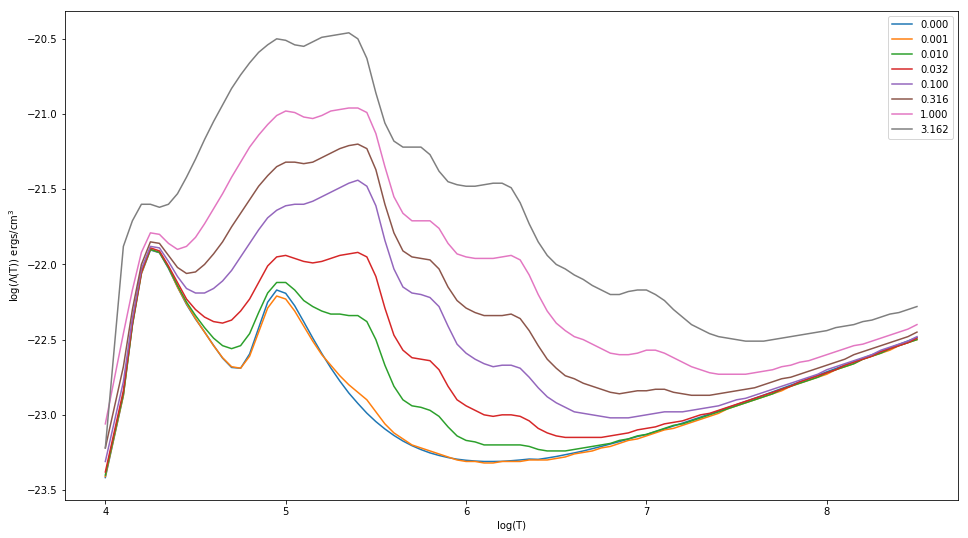

In [38]:
def read_coolingfunction(fname):
    Zg=[0.0,1.0E-03,1.0E-02,3.162278E-02,1.0E-01,0.31622777,1.0,3.1622777]
    Zstr=[]
    for Z in Zg:
        Zstr.append("{:.3f}".format(Z))
    logT,L0,L1,L2,L3,L4,L5,L6,L7=np.loadtxt(fname,unpack=True)
    plt.pyplot.plot(logT,L0,label=Zstr[0])
    plt.pyplot.plot(logT,L1,label=Zstr[1])
    plt.pyplot.plot(logT,L2,label=Zstr[2])
    plt.pyplot.plot(logT,L3,label=Zstr[3])
    plt.pyplot.plot(logT,L4,label=Zstr[4])
    plt.pyplot.plot(logT,L5,label=Zstr[5])
    plt.pyplot.plot(logT,L6,label=Zstr[6])
    plt.pyplot.plot(logT,L7,label=Zstr[7])
    plt.pyplot.xlabel("log(T)")
    plt.pyplot.ylabel(r"log($\Lambda$(T)) ergs/cm$^3$")
    plt.pyplot.legend()
    plt.pyplot.savefig("coolingfunc.pdf")
    plt.pyplot.show()

fname="/Users/astrocomnyc/Desktop/newcool.dat"
read_coolingfunction(fname)

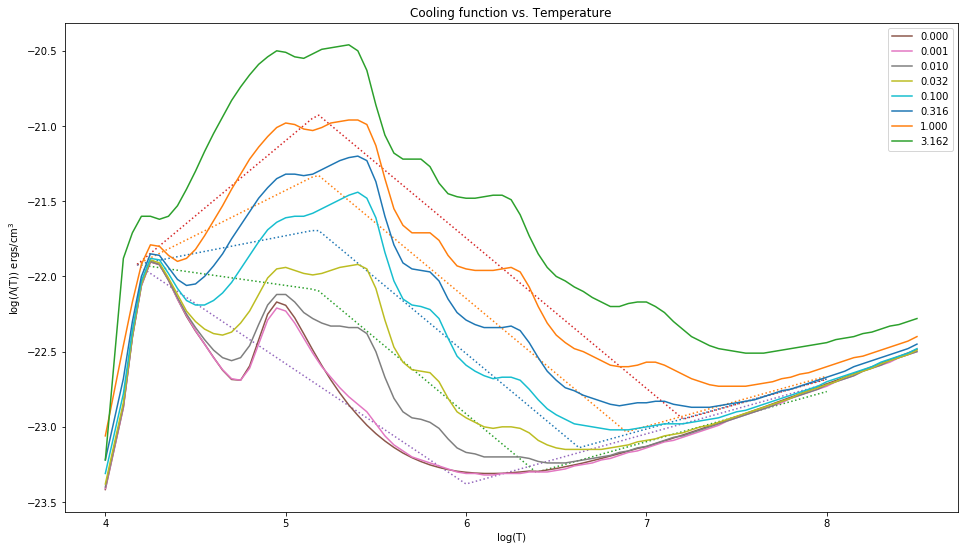

In [39]:
plt.pyplot.plot(np.log10(temperatureRange), np.log10(1.0e-23 * coolingFunctionTenth), linestyle = ':')
plt.pyplot.plot(np.log10(temperatureRange), np.log10(1.0e-23 * coolingFunctionThree), linestyle = ':')
plt.pyplot.plot(np.log10(temperatureRange), np.log10(1.0e-23 * coolingFunctionPoint03), linestyle = ':')
plt.pyplot.plot(np.log10(temperatureRange), np.log10(1.0e-23 * coolingFunctionFull), linestyle = ':')
plt.pyplot.plot(np.log10(temperatureRange), np.log10(1.0e-23 * coolingFunctionClean), linestyle = ':')

plt.pyplot.legend(['$Z_{g} = 0.1$', '$Z_{g} = 0.3$', '$Z_{g} = 0.03$', '$Z_{g} = 1.0$', '$Z_{g} = 0.0$'], loc='upper right')

plt.pyplot.xlabel('Temperature ($K$)')
plt.pyplot.ylabel('Cooling function ($cm^3*erg/s$)')
plt.pyplot.title('Cooling function vs. Temperature')

plt.pyplot.rcParams["figure.figsize"] = [16,9]
read_coolingfunction(fname)

In [40]:
def L23f_cyl(radius, tHot, metallicity):
    temperature = tempCyl(radius,tHot)
    L23f = np.zeros_like(temperature)
    tempB = 1.0e+06 + 1.5e+07*(metallicity)**(2.0/3.0)
    tempM = 1.5e+05
    tempR = 1.5e+04
    
    if (metallicity == 0.0):
        for i in np.arange(len(temperature)):
            alpha = -0.8
            tempB = 1.0e+06
            if ((temperature[i] >= tempR) and (temperature[i] <= tempB)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                #print i, temperature[i], (temperature[i]/tempR)
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempB/tempR)**(alpha))*((temperature[i]/tempB)**(1.0/3.0))
                #print i, temperature[i]
            else:
                return 'error!!!'
        return L23f
    
    elif ((metallicity <= 1.0) and (metallicity > 0.0)):
        alpha = (1.0 + ((1.0/3.0)*np.log(metallicity)))
        for i in np.arange(len(temperature)):
            if ((temperature[i] >= tempR) and (temperature[i]<= tempM)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                #print i, temperature[i], (temperature[i]/tempR)
            elif ((temperature[i] > tempM) and (temperature[i] <= tempB)):
                L23f[i] = (12.0*(tempM/tempR)**(alpha))*(temperature[i]/tempM)**(-1.0)
                #print i, temperature[i]
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempM/tempR)**(alpha))*((tempB/tempM)**(-1.0))*((temperature[i]/tempB)**(1.0/3.0))
                #print 12.0*((tempM/tempR)**(alpha))*((temperature[i]/tempB)**(1.0/3.0))
            else:
                return 'error!!!'
            
        return L23f
    else:
        return 'too metal for me!!!'

In [41]:
def L23f_sph(radius, tHot, metallicity):
    
    temperature = tempSph(radius,tHot)
    L23f = np.zeros_like(temperature)
    tempB = 1.0e+06 + 1.5e+07*(metallicity)**(2.0/3.0)
    tempM = 1.5e+05
    tempR = 1.5e+04
    
    if (metallicity == 0.0):
        for i in np.arange(len(temperature)):
            alpha = -0.8
            tempB = 1.0e+06
            if ((temperature[i] >= tempR) and (temperature[i] <= tempB)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                #print i, temperature[i], (temperature[i]/tempR)
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempB/tempR)**(alpha))*((temperature[i]/tempB)**(1.0/3.0))
                #print i, temperature[i]
            else:
                return 'error!!!'
        return L23f
    
    elif ((metallicity <= 1.0) and (metallicity > 0.0)):
        alpha = (1.0 + ((1.0/3.0)*np.log(metallicity)))
        for i in np.arange(len(temperature)):
            if ((temperature[i] >= tempR) and (temperature[i]<= tempM)):
                L23f[i] = 12.0*((temperature[i]/tempR)**(alpha))
                #print i, temperature[i], (temperature[i]/tempR)
            elif ((temperature[i] > tempM) and (temperature[i] <= tempB)):
                L23f[i] = (12.0*(tempM/tempR)**(alpha))*(temperature[i]/tempM)**(-1.0)
                #print i, temperature[i]
            elif (temperature[i] > tempB):
                L23f[i] = 12.0*((tempM/tempR)**(alpha))*((tempB/tempM)**(-1.0))*((temperature[i]/tempB)**(1.0/3.0))
                #print 12.0*((tempM/tempR)**(alpha))*((temperature[i]/tempB)**(1.0/3.0))
            else:
                return 'error!!!'
            
        return L23f
    else:
        return 'too metal for me!!!'

L23f_cyl(radii, 10**6, 1.0)

In [42]:
def coolingFunctionCyl(radius, tHot, metallicity):
    return 1.0e-23 * L23f_cyl(radius, tHot, metallicity)
def coolingFunctionSph(radius, tHot, metallicity):
    return 1.0e-23 * L23f_sph(radius, tHot, metallicity)

In [43]:
cylinderRads_tenth = coolingFunctionCyl(radii, 10**6, 0.1)
sphereRads_tenth = coolingFunctionSph(radii, 10**6, 0.1)
cylinderRads5_tenth = coolingFunctionCyl(radii, 10**5, 0.1)
sphereRads5_tenth = coolingFunctionSph(radii, 10**5, 0.1)

[1.20000000e-22 1.29110377e-22 1.36361507e-22 ... 3.07543457e-23
 3.07485954e-23 3.07428510e-23]


# Thermal radiation vs. Radius

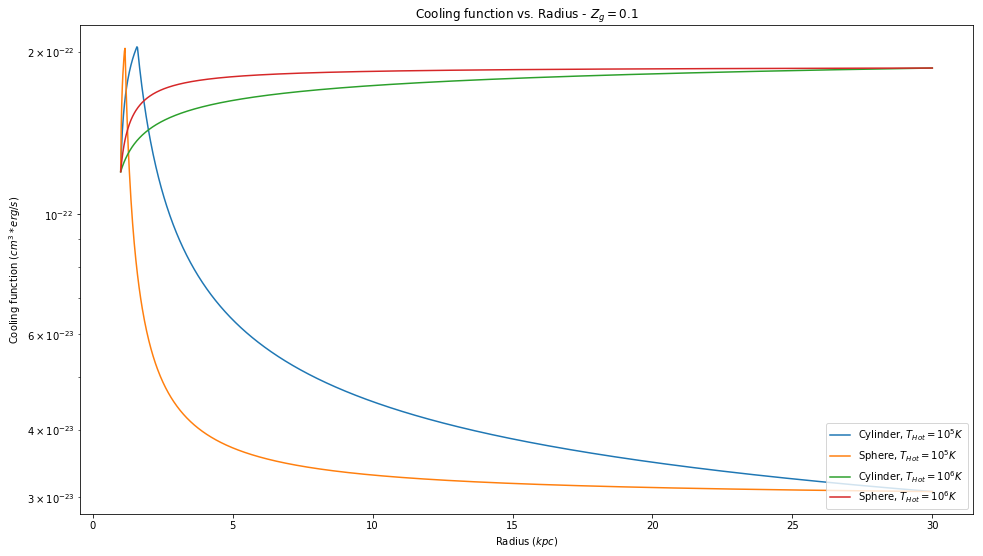

In [47]:
plt.pyplot.semilogy(radii, cylinderRads_tenth)
plt.pyplot.semilogy(radii, sphereRads_tenth)
plt.pyplot.semilogy(radii, cylinderRads5_tenth)
plt.pyplot.semilogy(radii, sphereRads5_tenth)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Cooling function ($cm^3*erg/s$)')
plt.pyplot.title('Cooling function vs. Radius - $Z_g = 0.1$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Thermal radiation vs Radius - tenth.png')
plt.pyplot.show()

In [48]:
cylinderRads_quarter = coolingFunctionCyl(radii, 10**6, 0.25)
sphereRads_quarter = coolingFunctionSph(radii, 10**6, 0.25)
cylinderRads5_quarter = coolingFunctionCyl(radii, 10**5, 0.25)
sphereRads5_quarter = coolingFunctionSph(radii, 10**5, 0.25)

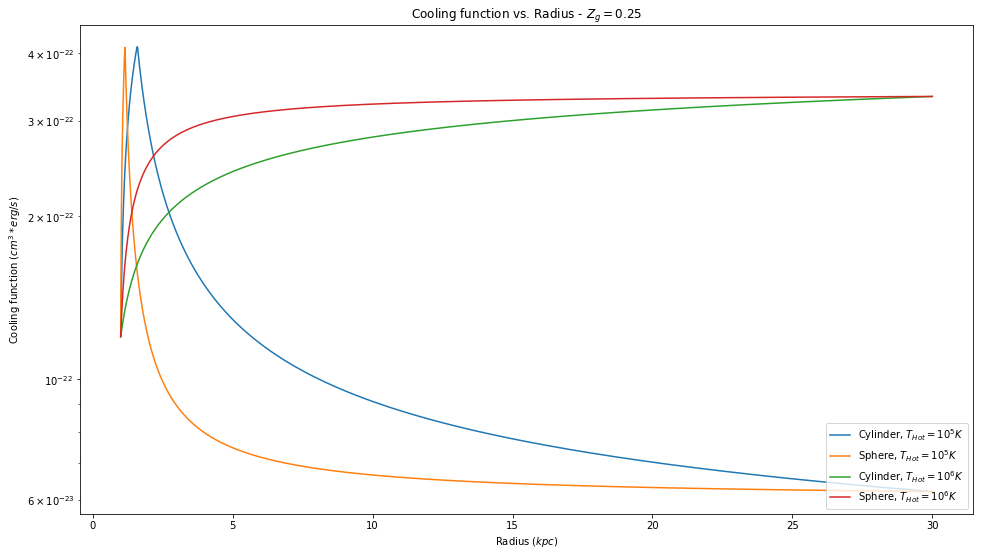

In [49]:
plt.pyplot.semilogy(radii, cylinderRads_quarter)
plt.pyplot.semilogy(radii, sphereRads_quarter)
plt.pyplot.semilogy(radii, cylinderRads5_quarter)
plt.pyplot.semilogy(radii, sphereRads5_quarter)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Cooling function ($cm^3*erg/s$)')
plt.pyplot.title('Cooling function vs. Radius - $Z_g = 0.25$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Cooling function vs Radius - quarter.png')
plt.pyplot.show()

In [50]:
cylinderRads_clean = coolingFunctionCyl(radii, 10**6, 0.0)
sphereRads_clean = coolingFunctionSph(radii, 10**6, 0.0)
cylinderRads5_clean = coolingFunctionCyl(radii, 10**5, 0.0)
sphereRads5_clean = coolingFunctionSph(radii, 10**5, 0.0)

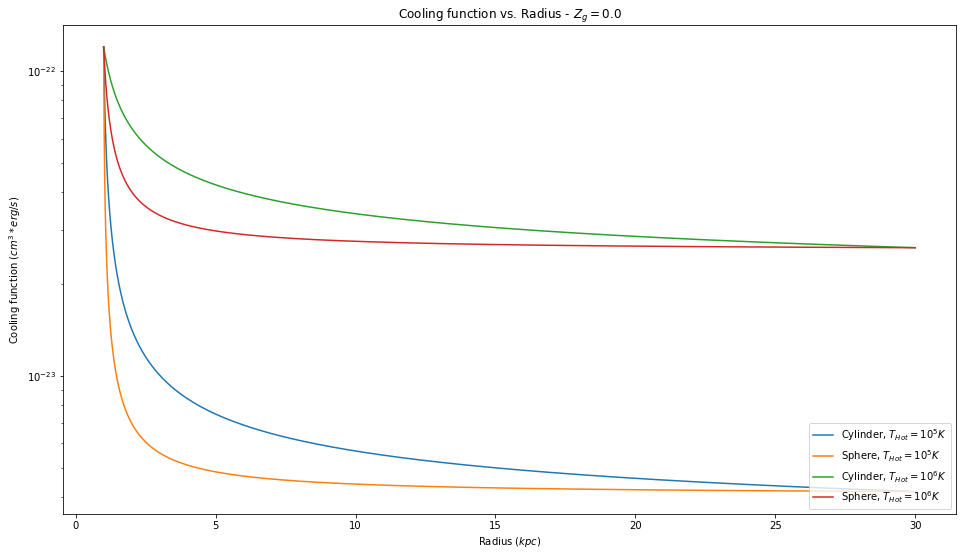

In [51]:
plt.pyplot.semilogy(radii, cylinderRads_clean)
plt.pyplot.semilogy(radii, sphereRads_clean)
plt.pyplot.semilogy(radii, cylinderRads5_clean)
plt.pyplot.semilogy(radii, sphereRads5_clean)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Cooling function ($cm^3*erg/s$)')
plt.pyplot.title('Cooling function vs. Radius - $Z_g = 0.0$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Cooling function vs Radius - quarter.png')
plt.pyplot.show()

# Triple plot

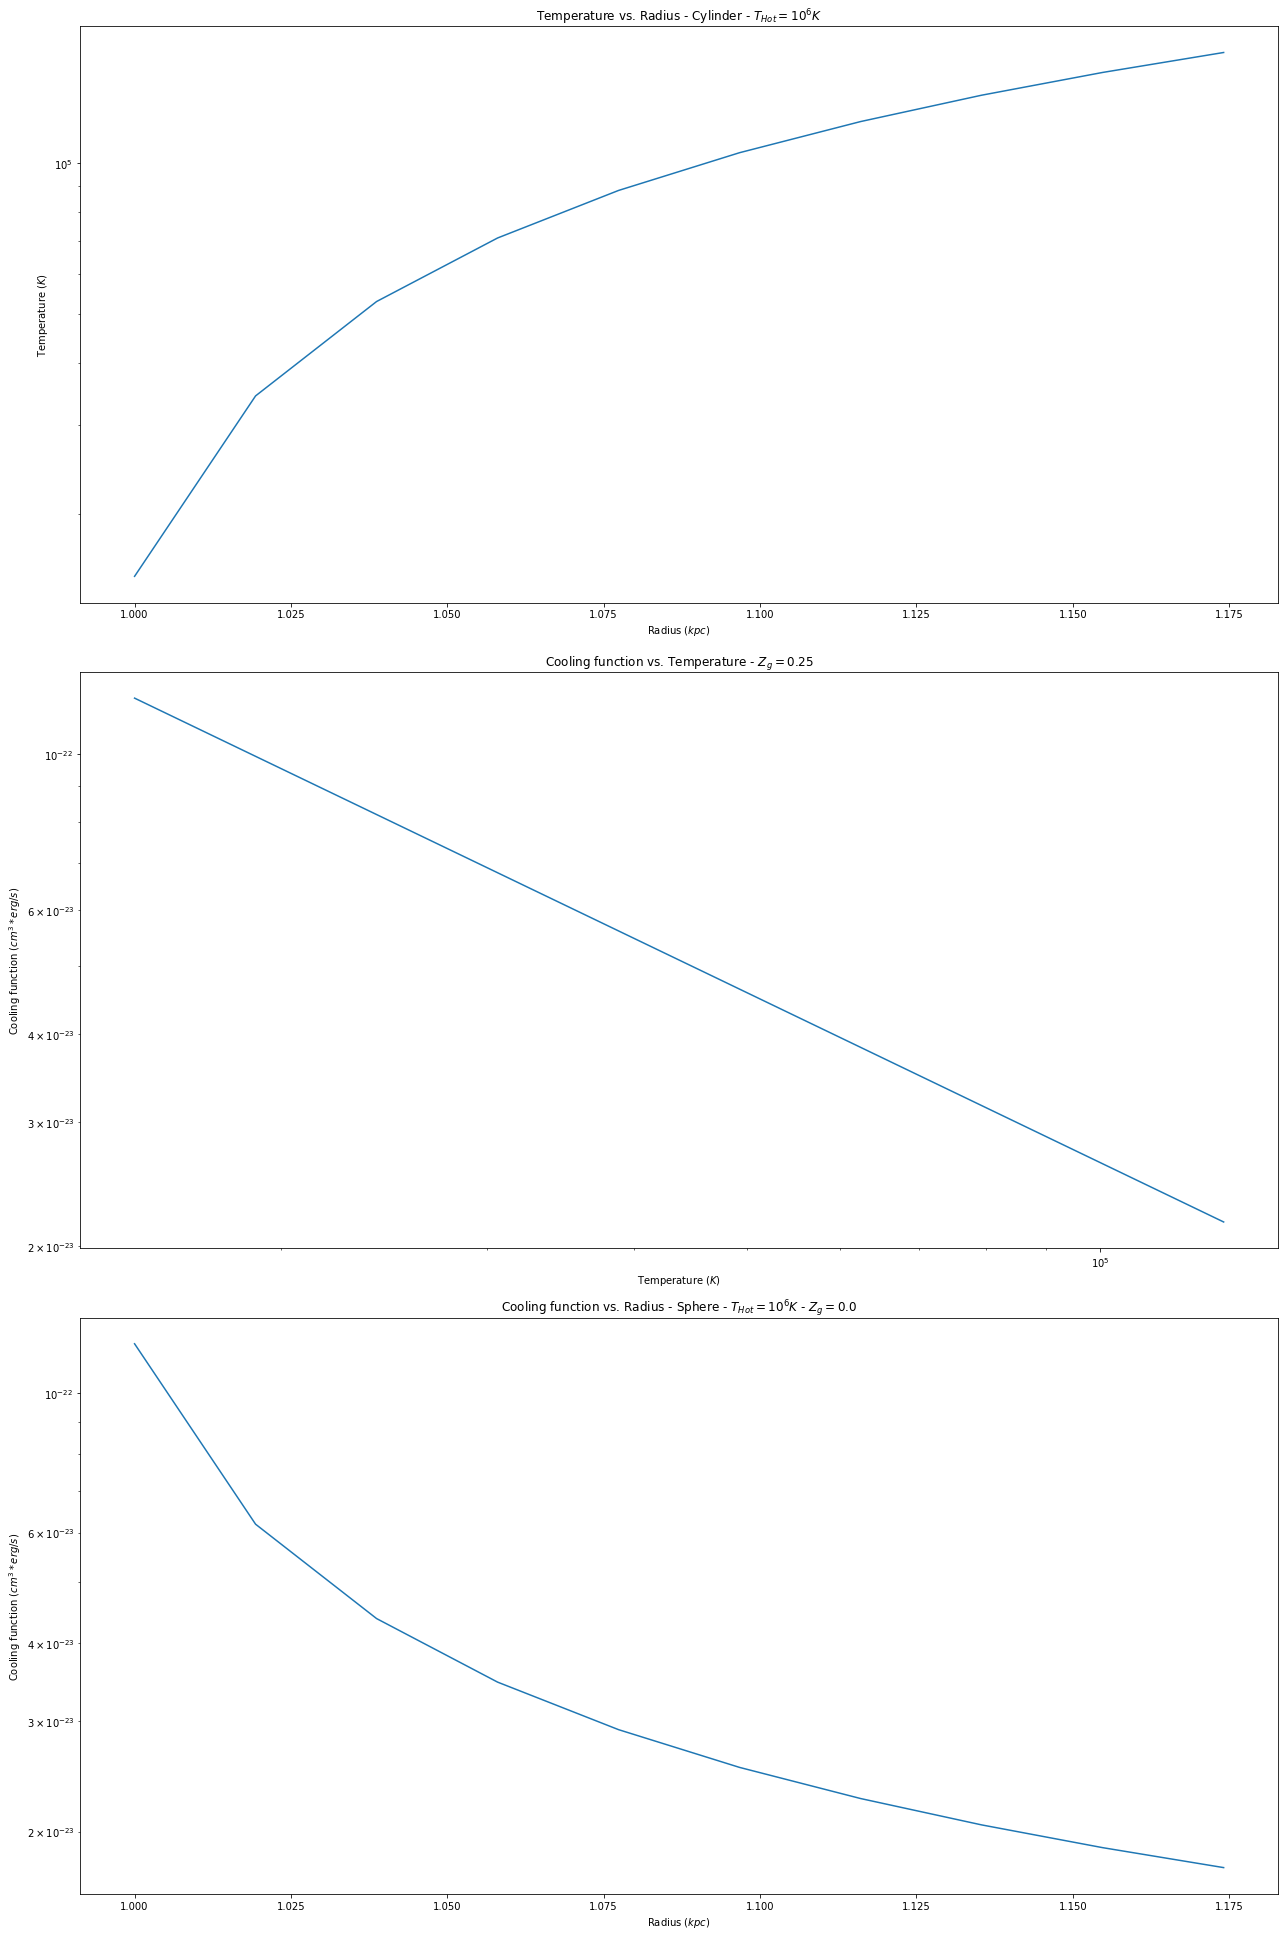

In [52]:
triplePlot = plt.pyplot.figure(figsize=(18,27))
triplePlot1 = triplePlot.add_subplot(311)
triplePlot2 = triplePlot.add_subplot(312)
triplePlot3 = triplePlot.add_subplot(313)

triplePlot1.semilogy(radii[:10], sphereRange[:10])
triplePlot1.set_xlabel('Radius ($kpc$)')
triplePlot1.set_ylabel('Temperature ($K$)')
triplePlot1.set_title('Temperature vs. Radius - Cylinder - $T_{Hot} = 10^6 K$')
        
triplePlot2.loglog(temperatureRange[:10], (1.0e-23 * coolingFunctionClean[:10]))
triplePlot2.set_xlabel('Temperature ($K$)')
triplePlot2.set_ylabel('Cooling function ($cm^3*erg/s$)')
triplePlot2.set_title('Cooling function vs. Temperature - $Z_g = 0.25$')
        
triplePlot3.semilogy(radii[:10], sphereRads_clean[:10])
triplePlot3.set_xlabel('Radius ($kpc$)')
triplePlot3.set_ylabel('Cooling function ($cm^3*erg/s$)')
triplePlot3.set_title('Cooling function vs. Radius - Sphere - $T_{Hot} = 10^6 K$ - $Z_g = 0.0$')

plt.pyplot.savefig('Triple Plot.png')
plt.pyplot.tight_layout()

In [59]:
def radiativeHeatCyl(radius,tHot,metallicity):
    return ((10**(-3))**2) * coolingFunctionCyl(radius, tHot, metallicity)
def radiativeHeatSph(radius,tHot,metallicity):
    return ((10**(-3))**2) * coolingFunctionSph(radius, tHot, metallicity)

In [54]:
cylinderRads_quarter = radiativeHeatCyl(radii, 10**6, 0.25)
sphereRads_quarter = radiativeHeatSph(radii, 10**6, 0.25)
cylinderRads5_quarter = radiativeHeatCyl(radii, 10**5, 0.25)
sphereRads5_quarter = radiativeHeatSph(radii, 10**5, 0.25)

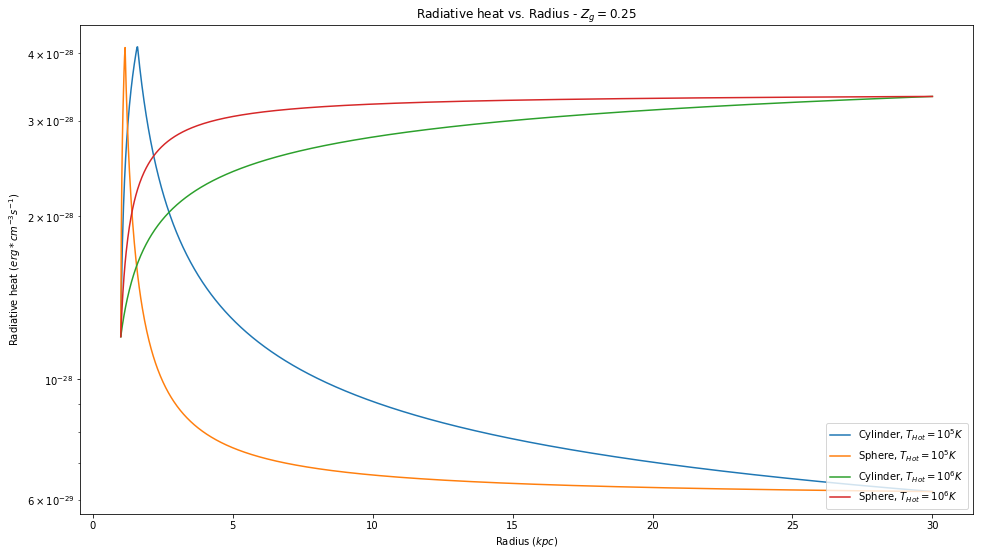

In [55]:
plt.pyplot.semilogy(radii, cylinderRads_quarter)
plt.pyplot.semilogy(radii, sphereRads_quarter)
plt.pyplot.semilogy(radii, cylinderRads5_quarter)
plt.pyplot.semilogy(radii, sphereRads5_quarter)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Radiative heat ($erg*cm^{-3}s^{-1}$)')
plt.pyplot.title('Radiative heat vs. Radius - $Z_g = 0.25$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Radiative heat vs Radius - quarter.png')
plt.pyplot.show()

In [56]:
cylinderRads_tenth = radiativeHeatCyl(radii, 10**6, 0.1)
sphereRads_tenth = radiativeHeatSph(radii, 10**6, 0.1)
cylinderRads5_tenth = radiativeHeatCyl(radii, 10**5, 0.1)
sphereRads5_tenth = radiativeHeatSph(radii, 10**5, 0.1)

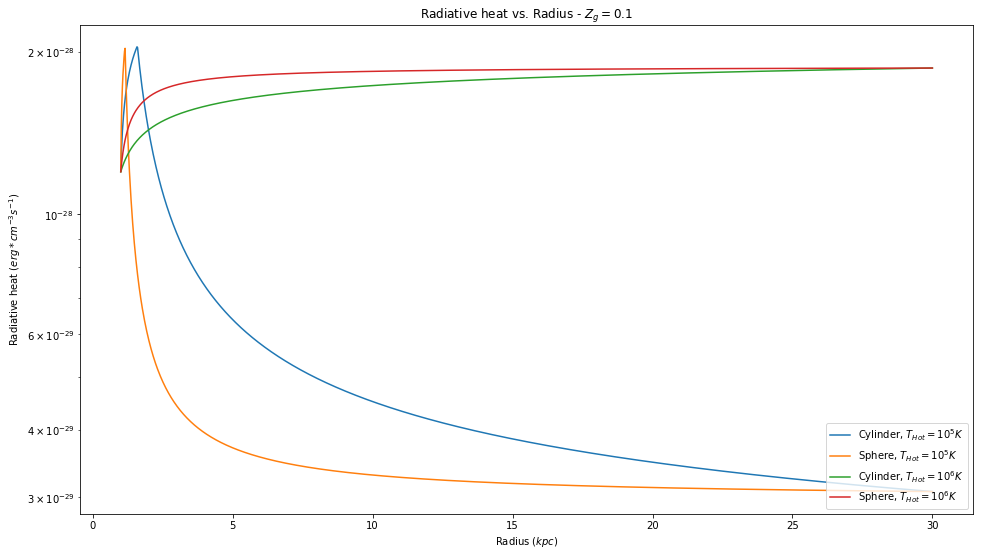

In [57]:
plt.pyplot.semilogy(radii, cylinderRads_tenth)
plt.pyplot.semilogy(radii, sphereRads_tenth)
plt.pyplot.semilogy(radii, cylinderRads5_tenth)
plt.pyplot.semilogy(radii, sphereRads5_tenth)

plt.pyplot.legend(['Cylinder, $T_{Hot} = 10^5 K$', 'Sphere, $T_{Hot} = 10^5 K$', 'Cylinder, $T_{Hot} = 10^6 K$', 'Sphere, $T_{Hot} = 10^6 K$'], loc='lower right')

plt.pyplot.xlabel('Radius ($kpc$)')
plt.pyplot.ylabel('Radiative heat ($erg*cm^{-3}s^{-1}$)')
plt.pyplot.title('Radiative heat vs. Radius - $Z_g = 0.1$')

plt.pyplot.rcParams["figure.figsize"] = [16,9]

plt.pyplot.savefig('Thermal radiation vs Radius - tenth.png')
plt.pyplot.show()